# (6주차) 10월19일
> 드랍아웃, fastai를 이용한 학습, CPU vs GPU

- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈

### 강의영상

> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wx30jOB2SlQDFwQDORTZOB

In [1]:
import torch 
import matplotlib.pyplot as plt 

In [2]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

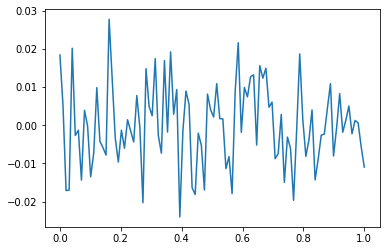

In [3]:
plt.plot(X,y)

### 네트워크 설정, 옵티마이저, 로스 

In [4]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

### 모형학습 

In [5]:
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 

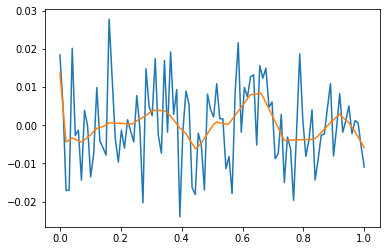

In [6]:
plt.plot(X,y) 
plt.plot(X,yhat.data)

- 잘못나왓음.
- y는 완전 random이기 때문에 다음 값을 예측할 때 가장 합리적인 대답은 0.
- 대표적인 overfitting 사례

### train / validation 

- 위와 같은 문제를 해결하기 위하여
- 80개는 training, 나머지는 validation
- 학습한 걸로 나머지 20개 맞추는 거 확인해보기

In [7]:
X1=X[:80]
y1=y[:80]
X2=X[80:]
y2=y[80:] 

In [8]:
torch.manual_seed(1) 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [9]:
for epoc in range(1000): 
    ## 1 
    y1hat=net(X1) 
    ## 2 
    loss=loss_fn(y1hat,y1) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step() 
    net.zero_grad() 

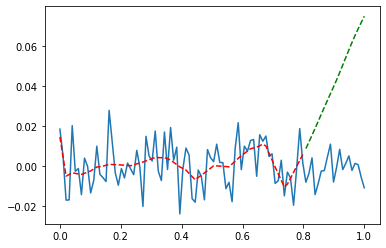

In [10]:
plt.plot(X,y)
plt.plot(X1,net(X1).data,'--r') 
plt.plot(X2,net(X2).data,'--g') 

### 드랍아웃 

- parameter 수가 많아져서 overfitting 현상때문에 위와 같은 현상이 나타남
- 변수를 줄이자는 아이디어 -> 드랍아웃

In [11]:
X1=X[:80]
y1=y[:80]
X2=X[80:]
y2=y[80:] 

- Dropout을 0.8로 줘서 들어온 변수 중 80%가 0으로 출력되게 함

In [25]:
torch.manual_seed(1) 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [26]:
for epoc in range(1000): 
    ## 1 
    y1hat=net(X1) 
    ## 2 
    loss=loss_fn(y1hat,y1) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step() 
    net.zero_grad() 

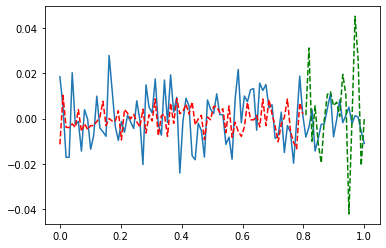

In [23]:
plt.plot(X,y)
plt.plot(X1,net(X1).data,'--r') 
plt.plot(X2,net(X2).data,'--g') 

- 학습을 할 때는 드랍아웃으로 노드?를 날렸다 -> 그 노드는 학습을 멈춤
- 에폭마다 20%의 노드만 학습이 되는 것 -> 좋은 노드들만 업데이트가 되는 것임
- 평가를 할 때는 임의로 0을 만들 필요가 없음 -> 모든 weight를 사용하여야 함

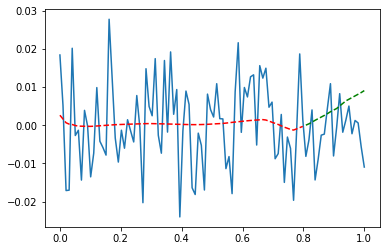

In [28]:
net.eval() ## 네트워크를 평가모드로 전환_evaluation
plt.plot(X,y)
plt.plot(X1,net(X1).data,'--r') 
plt.plot(X2,net(X2).data,'--g') 

- 그런데 학습한 것만 보면 두 그래프 중 무엇이 더 좋은지 말하기 힘들다 -> 첫번째는 오버피팅, 두번째는 언더피팅하는 것처럼 보여서

### 학습과정 비교 (주의: 코드복잡함)  

`-` 데이터 생성

In [55]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1) 
y=torch.randn(100).reshape(100,1) 

`-` tr/val 분리

In [56]:
X_tr=X[:80]
y_tr=y[:80]
X_val=X[80:]
y_val=y[80:] 

`-` 네트워크, 옵티마이저, 손실함수 설정 

- 드랍아웃을 이용한 네트워크 (net2)와 그렇지 않은 네트워크 (net1) 
- 대응하는 옵티마이저 1,2 설정 
- 손실함수 

In [57]:
torch.manual_seed(1) 
net1=torch.nn.Sequential(
    torch.nn.Linear(1,512), 
    torch.nn.ReLU(),
    torch.nn.Linear(512,1)) 
optimizer_net1 = torch.optim.Adam(net1.parameters()) 
net2=torch.nn.Sequential(
    torch.nn.Linear(1,512), 
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(512,1)) 
optimizer_net2 = torch.optim.Adam(net2.parameters())
loss_fn=torch.nn.MSELoss()

- 시뮬레이션 결과를 저장하기 위한 공간을 만들자

In [58]:
tr_loss_net1=[] 
val_loss_net1=[]
tr_loss_net2=[] 
val_loss_net2=[] 

- net1을 학습시켜보자

In [59]:
for epoc in range(1000): 
    ## 1 
    yhat_tr_net1 = net1(X_tr) 
    ## 2 
    loss_tr = loss_fn(yhat_tr_net1, y_tr) 
    ## 3 
    loss_tr.backward() 
    ## 4 
    optimizer_net1.step()
    net1.zero_grad() 
    ## 5 기록 
    ### tr 
    tr_loss_net1.append(loss_tr.item())
    
    ### val 
    yhat_val_net1 = net1(X_val) 
    loss_val = loss_fn(yhat_val_net1,y_val) 
    val_loss_net1.append(loss_val.item())

- net2를 학습시켜보자

In [60]:
for epoc in range(1000): 
    ## 1 
    yhat_tr_net2 = net2(X_tr) 
    ## 2 
    loss_tr = loss_fn(yhat_tr_net2, y_tr) 
    ## 3 
    loss_tr.backward() 
    ## 4 
    optimizer_net2.step()
    net2.zero_grad() 
    ## 5 기록 
    ### tr 
    net2.eval()   #net2는 드랍아웃 시켰으니까 넣어줘야 해!
    tr_loss_net2.append(loss_tr.item())
    ### val 
    yhat_val_net2 = net2(X_val) 
    loss_val = loss_fn(yhat_val_net2,y_val) 
    val_loss_net2.append(loss_val.item())
    net2.train()

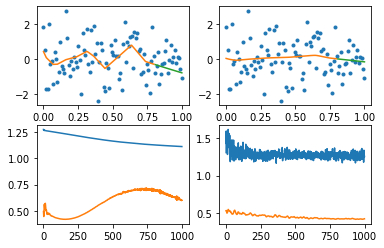

In [53]:
net2.eval() 
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(X,y,'.');ax1.plot(X_tr,net1(X_tr).data); ax1.plot(X_val,net1(X_val).data); 
ax2.plot(X,y,'.');ax2.plot(X_tr,net2(X_tr).data); ax2.plot(X_val,net2(X_val).data); 
ax3.plot(tr_loss_net1);ax3.plot(val_loss_net1);
ax4.plot(tr_loss_net2);ax4.plot(val_loss_net2);

- 다음에 기억을 잘 할 수 있게 코드를 각각 정리해주면
```python
net2.eval() #드랍아웃 쓴 net2 평가모드로
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)  #그래프 그릴 창 만들어주고
ax1.plot(X,y,'.');ax1.plot(X_tr,net1(X_tr).data); #주황색 선 그리기
    ax1.plot(X_val,net1(X_val).data); #초록색 선 그리기
ax2.plot(X,y,'.');ax2.plot(X_tr,net2(X_tr).data); #주황색 선 그리기
    ax2.plot(X_val,net2(X_val).data); #초록색 선 그리기 : 합리적인 추론(=0)에 근사한 예측치를 보여준다(net1에 비해서)
ax3.plot(tr_loss_net1);ax3.plot(val_loss_net1);  #net1 loss 관찰 : tr_loss(파란선)은 줄어드는 모습, 주황선은 우리가 보지 못한 데이터에 대한 것인데 줄어들다가 증가하는 모습을 보임->과적합, 어느 순간부터 제대로 학습이 되지 않고 있음
ax4.plot(tr_loss_net2);ax4.plot(val_loss_net2);  #net2 loss 관찰 : tr_loss(파란선)은 줄어드는 모습, 주황선은 우리가 보지 못한 데이터에 대한 것인데 감소하는 모습을 보임
```

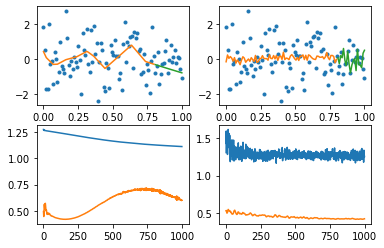

In [61]:
#net2.eval() 
fig , ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(X,y,'.');ax1.plot(X_tr,net1(X_tr).data); ax1.plot(X_val,net1(X_val).data); 
ax2.plot(X,y,'.');ax2.plot(X_tr,net2(X_tr).data); ax2.plot(X_val,net2(X_val).data); 
ax3.plot(tr_loss_net1);ax3.plot(val_loss_net1);
ax4.plot(tr_loss_net2);ax4.plot(val_loss_net2);

`-` 다 좋은데 코드를 짜는것이 너무 힘들다. 

- 생각해보니까 미니배치도 만들어야 함 + 미니배치를 나눈상태에서 GPU 메모리에 파라메터도 올려야함. 
- 조기종료(val_loss가 다시 증가하기 전에 감소)와 같은 기능도 구현해야함 + 기타등등을 구현해야함. 
- 나중에는 학습률을 서로 다르게 돌려가며 결과도 기록해야함 $\to$ 그래야 좋은 학습률 선택가능 
- for문안에 step1~step4를 넣는것도 너무 반복작업임. 
- 등등.. 

`-` 위와 같은 것들의 특징: 머리로 상상하기는 쉽지만 실제 구현하는 것은 까다롭다. 

`-` 사실 우리가 하고싶은것 

- **아키텍처를 설계**: 데이터를 보고 맞춰서 설계해야할 때가 많음 (우리가 해야한다) 
- 손실함수: 통계학과 교수님들이 연구하심 
- 옵티마이저: 산공교수님들이 연구하심 

`-` 제 생각 

- 기업의욕심: read-data를 분석하는 딥러닝 아키텍처 설계 $\to$ 아키텍처별로 결과를 관찰 (편하게) $\Longrightarrow$ fastai + read data 
- 학생의욕심: 그러면서도 모형이 돌아가는 원리는 아주 세밀하게 알고싶음 $\Longrightarrow$ pytorch + toy example (regression 등을 위주로) 
- 연구자의욕심: 기존의 모형을 조금 변경해서 쓰고싶음 $\Longrightarrow$ (pytorch +fastai) + any data 

`-` **tensorflow + keras** vs **pytorch + fastai** 

### pytorch + fastai 

`-` 데이터셋을 만든다. 

In [62]:
X_tr=X[:80]
y_tr=y[:80]
X_val=X[80:]
y_val=y[80:] 

In [63]:
ds1=torch.utils.data.TensorDataset(X_tr,y_tr) 
ds2=torch.utils.data.TensorDataset(X_val,y_val) 

`-` 데이터로더를 만든다. 

In [66]:
dl1 = torch.utils.data.DataLoader(ds1, batch_size=80) 
dl2 = torch.utils.data.DataLoader(ds2, batch_size=20) 

`-` 데이터로더스(데이터로더의 집합)를 만든다. 

In [67]:
from fastai.vision.all import * 

In [68]:
dls=DataLoaders(dl1,dl2) 

#### 드랍아웃 제외버전 

`-` 네트워크 설계 (드랍아웃 제외) 

In [69]:
torch.manual_seed(1) 
net_fastai = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=512),
    torch.nn.ReLU(),
    #torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512, out_features=1)) 
#optimizer 
loss_fn=torch.nn.MSELoss()

`-` 러너오브젝트 (for문 대신돌려주는 오브젝트) 

In [70]:
lrnr= Learner(dls,net_fastai,opt_func=Adam,loss_func=loss_fn) 

`-` 에폭만 설정하고 바로 학습

In [71]:
#collapse-output
lrnr.fit(1000)

epoch,train_loss,valid_loss,time
0,1.277156,0.491314,00:00
1,1.277145,0.455286,00:00
2,1.275104,0.444275,00:00
3,1.274429,0.465787,00:00
4,1.273436,0.507203,00:00
5,1.272421,0.548102,00:00
6,1.271840,0.561292,00:00
7,1.271377,0.549409,00:00
8,1.270855,0.530416,00:00
9,1.270437,0.520700,00:00


`-` loss들도 에폭별로 기록되어 있음 

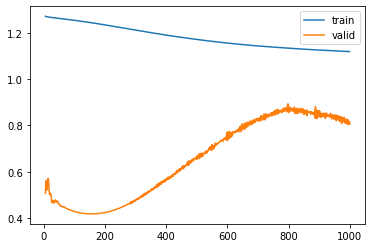

In [72]:
lrnr.recorder.plot_loss()

`-` net_fastai에도 파라메터가 업데이트 되어있음 

In [76]:
# list(net_fastai.parameters())
# list(net1.parameters()) #비교용, cuda 없음. cpu학습

- 리스트를 확인해보면 device가 cuda임
- net_fastai 의 파라메터가 알아서 GPU로 옮겨져서 학습됨. 

`-` 플랏 

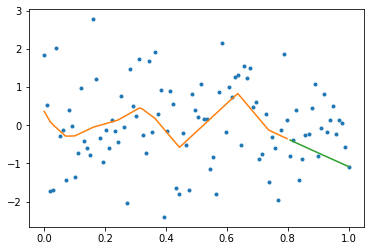

In [78]:
net_fastai.to("cpu") #같은 디바이스에 올려주기
plt.plot(X,y,'.')
plt.plot(X_tr,net_fastai(X_tr).data) 
plt.plot(X_val,net_fastai(X_val).data) 

#### 드랍아웃 추가버전 

`-` 네트워크 설계 (드랍아웃 추가) 

In [79]:
torch.manual_seed(1) 
net_fastai = torch.nn.Sequential(
    torch.nn.Linear(in_features=1, out_features=512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512, out_features=1)) 
#optimizer 
loss_fn=torch.nn.MSELoss()

`-` 러너오브젝트 (for문 대신돌려주는 오브젝트) 

In [80]:
lrnr= Learner(dls,net_fastai,opt_func=Adam,loss_func=loss_fn) 

`-` 에폭만 설정하고 바로 학습

In [83]:
#collapse-output
lrnr.fit(1000)

epoch,train_loss,valid_loss,time
0,1.247709,0.416773,00:00
1,1.246509,0.416574,00:00
2,1.250404,0.416343,00:00
3,1.254794,0.415792,00:00
4,1.255322,0.415081,00:00
5,1.262187,0.414570,00:00
6,1.257735,0.414416,00:00
7,1.263794,0.414380,00:00
8,1.273511,0.414440,00:00
9,1.280515,0.414707,00:00


`-` loss들도 에폭별로 기록되어 있음 

`-` 학습 중 오류가 나서 다시 시작했더니 - 자에 가까운 모양으로 그래프가 나왔다

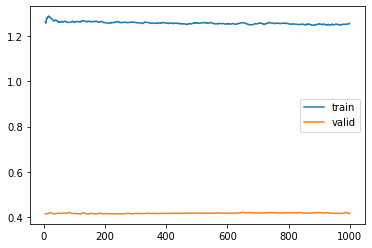

In [84]:
lrnr.recorder.plot_loss()

`-` net_fastai에도 파라메터가 업데이트 되어있음 

In [85]:
# list(net_fastai.parameters())

- 리스트를 확인해보면 net_fastai 의 파라메터가 알아서 GPU로 옮겨져서 학습됨. 

`-` 플랏 

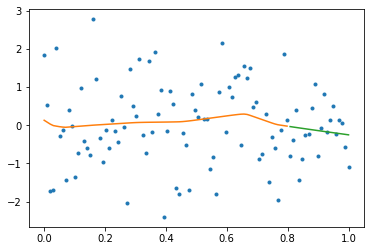

In [86]:
net_fastai.to("cpu") 
plt.plot(X,y,'.')
plt.plot(X_tr,net_fastai(X_tr).data) 
plt.plot(X_val,net_fastai(X_val).data) 

### CPU vs GPU 시간비교

In [87]:
import time 

In [101]:
time.time()  #초단위 시간을 보여줌

1641220642.7487211

#### CPU (512) 

In [102]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [103]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [104]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [105]:
t2-t1

0.28043293952941895

#### GPU (512) 

In [106]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [107]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [108]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [109]:
t2-t1

0.44712090492248535

`-` ?? CPU가 더 빠르다!!

#### CPU (20480) 

In [110]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [111]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=20480), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=20480,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [112]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [113]:
t2-t1

1.9087340831756592

#### GPU (20480) 

In [114]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [115]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=20480), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=20480,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [116]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [117]:
t2-t1

0.45605039596557617

#### CPU (204800) 

In [118]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [119]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=204800), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=204800,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [120]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [121]:
t2-t1

51.90764856338501

#### GPU (204800) 

In [122]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [123]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=204800), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=204800,out_features=1)) 
net.to("cuda:0")
X=X.to("cuda:0")
y=y.to("cuda:0")
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [124]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [125]:
t2-t1

1.4674291610717773

`-` 사이즈가 큰 네트워크일수록 GPU가 더 좋다!

### 숙제 

`-` 현재 작업하고 있는 컴퓨터에서 아래코드를 실행후 시간을 출력하여 스샷제출 

#### CPU (512) 

In [126]:
torch.manual_seed(5) 
X=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01

In [127]:
torch.manual_seed(1) # 초기가중치를 똑같이 
net=torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512), 
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)) 
optimizer= torch.optim.Adam(net.parameters())
loss_fn= torch.nn.MSELoss()

In [128]:
t1=time.time()
for epoc in range(1000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(yhat,y) 
    ## 3 
    loss.backward()
    ## 4 
    optimizer.step()
    net.zero_grad() 
t2=time.time()    

In [129]:
t2-t1

0.26400113105773926